In [1]:
import pandas as pd
import numpy as np

In [15]:
df1 = pd.read_csv('entrenar_st_1820.csv')
df2 = pd.read_csv('entrenar_st_1921.csv')
df3 = pd.read_csv('entrenar_st_2022.csv')
df4 = pd.read_csv('entrenar_st_2123.csv')
archivos = [df1,df2,df3,df4]

In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
def buscar_parametros_xgboost_st(colsampleT,learnR,depthM,estimators):
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = colsampleT, learning_rate = learnR,
            max_depth = depthM, alpha=10, n_estimators = estimators) 
    
    suma_errores = 0
    for df in archivos:
        X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=150)

        xg_reg.fit(X_train,y_train)
        preds = xg_reg.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        suma_errores += rmse
       
    error_promedio = suma_errores / len(archivos)
    print('RMSE promedio: %f' % (error_promedio))
    return (error_promedio)

In [7]:
colsampleT = 0.5
learnR = 0.1
depthM = 5
estimators = 10
errores = []
for v in [0.5,0.7,0.9,1]:
    colsampleT = v
    print('Colsample_bytree: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Colsample_bytree: 0.500000
RMSE promedio: 100257.548139
Colsample_bytree: 0.700000
RMSE promedio: 99957.961539
Colsample_bytree: 0.900000
RMSE promedio: 99749.975830
Colsample_bytree: 1.000000
RMSE promedio: 99680.640913
Error minimo 99680.640913 con valor 1.000000


In [8]:
colsampleT = 1
learnR = 0.1
depthM = 5
estimators = 10
errores = []
for v in [0.1,0.3,0.5,0.7,0.9,1.1]:
    learnR = v
    print('Learning_rate: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Learning_rate: 0.100000
RMSE promedio: 99680.640913
Learning_rate: 0.300000
RMSE promedio: 83855.898713
Learning_rate: 0.500000
RMSE promedio: 83703.032190
Learning_rate: 0.700000
RMSE promedio: 83812.522591
Learning_rate: 0.900000
RMSE promedio: 83914.128390
Learning_rate: 1.100000
RMSE promedio: 84084.543004
Error minimo 83703.032190 con valor 0.500000


In [16]:
colsampleT = 1
learnR = 0.5
depthM = 5
estimators = 10
errores = []
for v in [2,5,8,12,13]:
    depthM = v
    print('Depth: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Depth: 2.000000
RMSE promedio: 85542.720085
Depth: 5.000000
RMSE promedio: 83703.032190
Depth: 8.000000
RMSE promedio: 83753.676794
Depth: 12.000000
RMSE promedio: 85015.189634
Depth: 13.000000
RMSE promedio: 85516.381062
Error minimo 83703.032190 con valor 5.000000


In [17]:
colsampleT = 1
learnR = 0.5
depthM = 5
estimators = 10
errores = []
for v in [5,10,15]:
    estimators = v
    print('Estimators: %f'% (v))
    error = buscar_parametros_xgboost_st(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Estimators: 5.000000
RMSE promedio: 84015.265369
Estimators: 10.000000
RMSE promedio: 83703.032190
Estimators: 15.000000
RMSE promedio: 83668.032824
Error minimo 83668.032824 con valor 15.000000


## Importancia de features

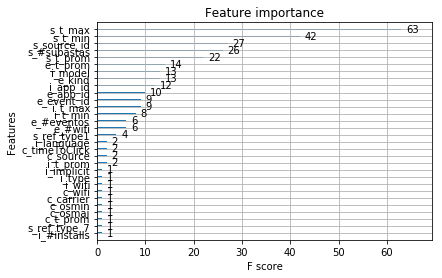

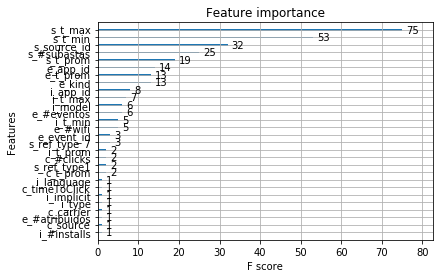

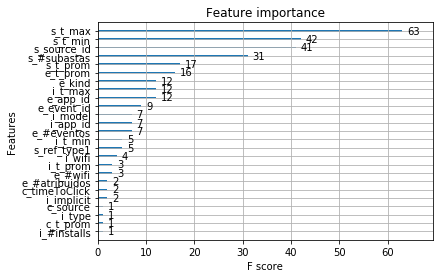

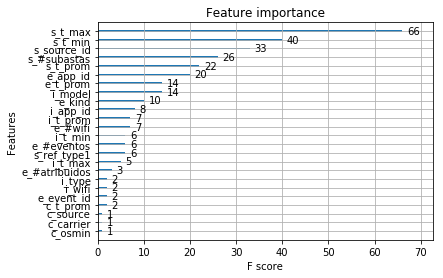

In [12]:
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    data_dmatrix = xgb.DMatrix(data=X,label=y)
    params = {"objective":"reg:linear",'colsample_bytree': 1,
              'learning_rate': 0.5, 'max_depth': 5, 'alpha': 10}
    xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
    xgb.plot_importance(xg_reg)

In [30]:
for df in archivos:
    df = df.drop(['e_#atribuidos','e_#eventos','e_#wifi','s_ref_type1','s_ref_type_7'],axis=1)

In [32]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
        colsample_bytree = 1, learning_rate = 0.5,
        max_depth = 5, alpha = 10, n_estimators = 30) 
    
suma_errores = 0
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=150)

    xg_reg.fit(X_train,y_train)
    preds = xg_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    suma_errores += rmse
       
error_promedio = suma_errores / len(archivos)
print('RMSE promedio: %f' % (error_promedio))

RMSE promedio: 83691.435737


In [18]:
predecir = pd.read_csv('predecir_st_2426.csv')
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 1, learning_rate = 0.5,
            max_depth = 5, alpha = 10, n_estimators = 15) 
    
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    xg_reg.fit(X,y)
preds = xg_reg.predict(predecir.drop(['ref_hash','segundos'],axis=1))
prediccion = pd.DataFrame(preds)
prediccion.columns = ['objetivo']
prediccion.head()

/home/cecilia/.local/lib/python2.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,objetivo
0,180007.078125
1,149844.390625
2,25122.697266
3,133977.546875
4,101252.687500


In [19]:
print(predecir.shape)
print(prediccion.shape)

(438282, 36)
(438282, 1)


In [20]:
prediccion = pd.DataFrame({'ref_hash': predecir['ref_hash'],
                           'obj': prediccion['objetivo']})
prediccion.to_csv('prediccion_st_2426.csv', index=False)
prediccion.head()

,obj,ref_hash
0,180007.078125,69039685746313
1,149844.390625,345999128501141
2,25122.697266,360710529886978
3,133977.546875,365882020742330
4,101252.687500,416301579449694
